### Data Drift: Visualizing Concept Drift
**Description**: Simulate concept drift by gradually changing the distribution of a binary target variable over simulated time periods. Plot these changes.

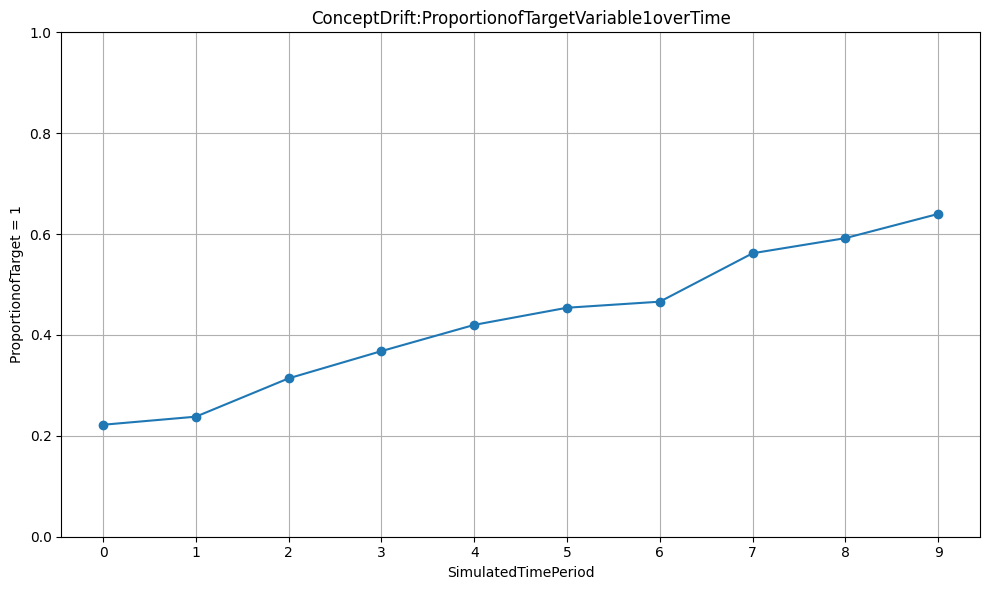

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
num_periods=10
samples_per_period=500
base_probability_of_1=0.2 #Startingprobabilityoftarget=1
drift_rate=0.05 #Howmuchprobabilitychangesperperiod
simulated_data=[]
for i in range(num_periods):
    current_probability=base_probability_of_1+(i*drift_rate)
    #Ensureprobabilitystayswithin0and1
    current_probability=max(0,min(1,current_probability))
    target_values=np.random.choice([0,1],size=samples_per_period,p=[1-current_probability,current_probability])
    df_period=pd.DataFrame({'period':i,'target':target_values})
    simulated_data.append(df_period)
full_df=pd.concat(simulated_data,ignore_index=True)
#Calculatetheproportionof'1'sineachperiod
drift_over_time=full_df.groupby('period')['target'].mean().reset_index()
drift_over_time.rename(columns={'target':'proportion_of_1'},inplace=True)
#Plotthechanges
plt.figure(figsize=(10,6))
plt.plot(drift_over_time['period'],drift_over_time['proportion_of_1'],marker='o',linestyle='-')
plt.title('ConceptDrift:ProportionofTargetVariable1overTime')
plt.xlabel('SimulatedTimePeriod')
plt.ylabel('ProportionofTarget = 1')
plt.grid(True)
plt.ylim(0,1)

plt.xticks(np.arange(0,num_periods,1))
plt.tight_layout()s
plt.show()